In [17]:
import pandas as pd
import matplotlib.pyplot as plt

####################
####################
## EURO 2015-2024 ##
# 4 count. + eur.  #
####################
####################

def clean_df(df):
    df = df.replace(":", pd.NA)
    df = df.dropna()
    df = df.apply(pd.to_numeric, errors='coerce')
    return df.dropna()
    
def load_excel_data(file_path, sheet_name, value_type):
    """Load and process Eurostat Excel data"""
    df = pd.read_excel(file_path, sheet_name=sheet_name, header=None)
    
    # Find data start row
    time_row = df[df[0].str.contains('TIME', na=False)].index[0]
    
    # Extract years from row
    years = df.iloc[time_row, 1::2].tolist()
    years = [str(y) for y in years if not pd.isna(y)]
    
    # Extract country data
    data = {}
    for idx in range(time_row+2, time_row+7):
        country = df.iloc[idx, 0]
        values = df.iloc[idx, 1::2].values
        data[country] = dict(zip(years, values))
    
    df_cleaned = clean_df(pd.DataFrame.from_dict(data, orient='index').stack().to_frame(value_type))
    df_cleaned.index.names = ['country', 'year']
    df_cleaned = df_cleaned.reset_index()
    df_cleaned['year'] = df_cleaned['year'].astype(str).str.extract(r'(\d{4})')[0].astype(int)
    
    return df_cleaned

# Load both datasets
immig = load_excel_data('data/migr_pop3ctb$defaultview_page_spreadsheet_foreign.xlsx', 
                         'Data', 'immig_pop')
total = load_excel_data('data/migr_pop3ctb$defaultview_page_spreadsheet_pop.xlsx', 
                       'Data', 'total_pop')
immig_flux = load_excel_data('data/migr_imm3ctb$defaultview_page_by_spreadsheet_immig.xlsx', 
                         'Data', 'immig_flux')
emigr_flux = load_excel_data('data/migr_emi4ctb$defaultview_page_by_spreadsheet_emigr.xlsx', 
                       'Data', 'emigr_flux')

# Merge datasets
df1 = pd.merge(immig, total, on=['country', 'year'], how='inner')
df2 = pd.merge(df1, immig_flux, on=['country', 'year'], how='inner')
df = pd.merge(df2, emigr_flux, on=['country', 'year'], how='inner')

#print("Aperçu du df fusionné :")
#print(df.head())

df['percentage_immig'] = (df['immig_pop'] / df['total_pop']) * 100
df['percentage_immig_flux'] = (df['immig_flux'] / df['total_pop']) * 100
df['solde_migration'] = df['immig_flux'] - df['emigr_flux'] 
df['percentage_solde_migration'] = (df['solde_migration'] / df['total_pop']) * 100

# Prepare data for plotting
countries = ['France', 'Germany', 'Italy', 'Spain', 'European Union - 27 countries (from 2020)']

#plot_data = df.pivot(index='year', columns='country', values='percentage_immig_flux')
plot_data = df[df['country'].isin(countries)].pivot(index='year', columns='country', values='percentage_immig_flux')

# Nettoyage des noms de pays
plot_data.columns = plot_data.columns.str.strip()

language = 'fr'
source = 'Eurostat'
champ = 'Union Européenne, France, Allemagne, Italie, Espagne'
print('B - Results')

if language == 'fr':
        label_for = "Etrangers"
        label_immig = "Immigrés"
        label_non_immig = "Non-immigrés"
        label_for_immig = "Immigré étrangers"
        label_born_fr_ab = "Né français à l\'étranger"
        label_demo = "Démographie"
        label_lec = "Lecture"
        label_champ = "Champ"
        label_annee = "Année"
elif language == 'en':
        label_for = "Foreigners"
        label_immig = "Immigrants"
        label_non_immig = "Non-immigrants"
        label_for_immig = "Foreign immigrants"
        label_born_fr_ab = "Born french abroad"
        label_demo = "Demography"
        label_lec = "Reading"
        label_champ = "Scope"
        label_annee = "Year"

def set_ax(ax, source_fr, source_en, note_fr, note_en, language, lecture_fr, lecture_en, title_fr, title_en, label_x, width, fontsize):
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    ax.grid(axis='x', linestyle='--', alpha=0.5)
    if language == 'fr':
        lecture = lecture_fr 
        title = title_fr 
        source = source_fr
        note = note_fr
    elif language == 'en':
        lecture = lecture_en
        title = title_en
        source = source_en
        note = note_en
    ax.set_xlabel(label_x, fontsize=fontsize )
    ax.set_title(title, fontsize=fontsize)
    if note == "":      
        ax.text(0, -0.24, label_lec+f': '+lecture+f".", transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize-2)
        ax.text(0, -0.31, label_champ+f': '+champ+f".", transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize-2)
        ax.text(0, -0.39, f'Source: '+source+".", transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize-2)
    else:      
        ax.text(0, -0.25, f'Note: '+note+f".", transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize-2)
        ax.text(0, -0.37, label_lec+f': '+lecture+f".", transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize-2)
        ax.text(0, -0.44, label_champ+f': '+champ+f".", transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize-2)
        ax.text(0, -0.51, f'Source: '+source+".", transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize-2)

/Users/lvm/Desktop/analyse/analyse-github/study/venv/lib/python3.13/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/lvm/Desktop/analyse/analyse-github/study/venv/lib/python3.13/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/lvm/Desktop/analyse/analyse-github/study/venv/lib/python3.13/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/lvm/Desktop/analyse/analyse-github/study/venv/lib/python3.13/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contai

B - Results


/Users/lvm/Desktop/analyse/analyse-github/study/venv/lib/python3.13/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/lvm/Desktop/analyse/analyse-github/study/venv/lib/python3.13/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


[Text(0.0, 0, '2015'),
 Text(1.0, 0, '2016'),
 Text(2.0, 0, '2017'),
 Text(3.0, 0, '2018'),
 Text(4.0, 0, '2019'),
 Text(5.0, 0, '2020'),
 Text(6.0, 0, '2021'),
 Text(7.0, 0, '2022'),
 Text(8.0, 0, '2023'),
 Text(9.0, 0, '2024')]

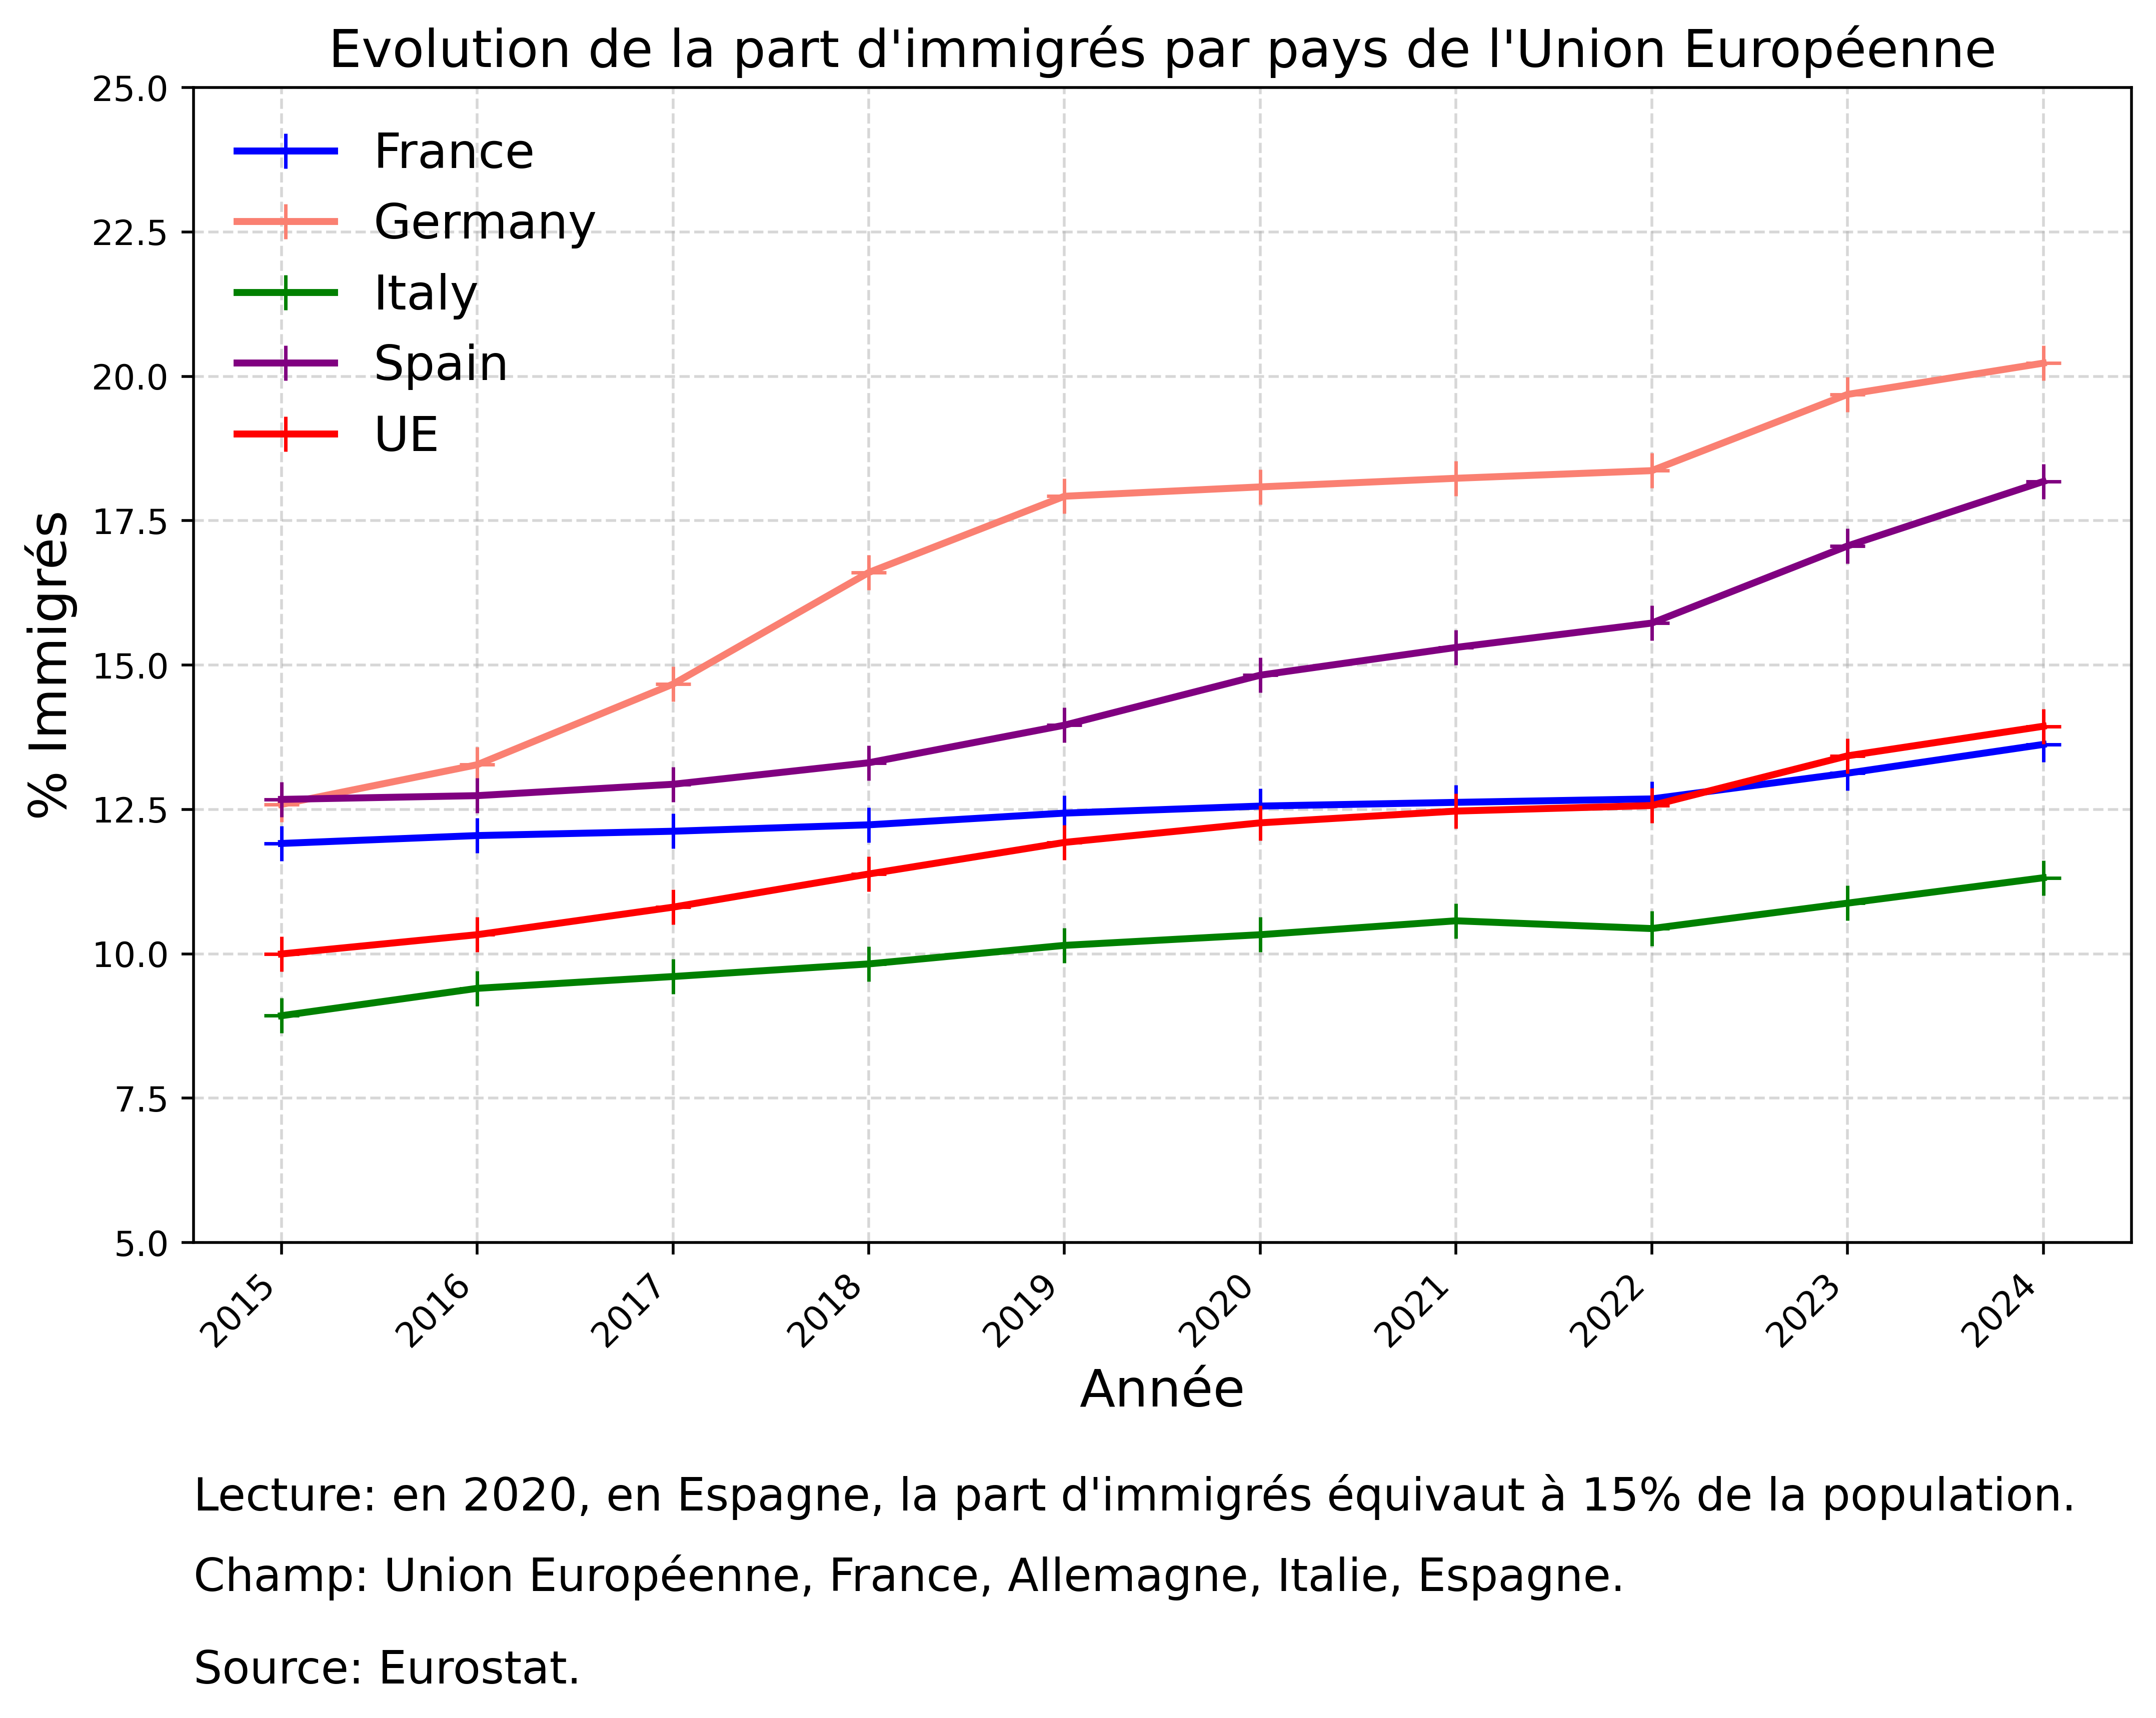

In [18]:
def load_excel_data(file_path, sheet_name, value_type):
    """Load and process Eurostat Excel data"""
    df = pd.read_excel(file_path, sheet_name=sheet_name, header=None)
    
    # Find data start row
    time_row = df[df[0].str.contains('TIME', na=False)].index[0]
    
    # Extract years from row
    years = df.iloc[time_row, 1::2].tolist()
    years = [str(y) for y in years if not pd.isna(y)]
    
    # Extract country data
    data = {}
    for idx in range(time_row+2, time_row+7):
        country = df.iloc[idx, 0]
        values = df.iloc[idx, 1::2].values
        data[country] = dict(zip(years, values))
    
    return pd.DataFrame.from_dict(data, orient='index').stack().to_frame(value_type)

# Load both datasets
foreign = load_excel_data('data/migr_pop3ctb$defaultview_page_spreadsheet_foreign.xlsx', 
                         'Data', 'foreign_pop')
total = load_excel_data('data/migr_pop3ctb$defaultview_page_spreadsheet_pop.xlsx', 
                       'Data', 'total_pop')

# Merge datasets
df = pd.merge(foreign, total, left_index=True, right_index=True)
df['percentage'] = (df['foreign_pop'] / df['total_pop']) * 100

# Prepare data for plotting
countries = ['France', 'Germany', 'Italy', 'Spain', 
            'European Union - 27 countries (from 2020)']
plot_data = df.reset_index().pivot(index='level_1', columns='level_0', values='percentage')

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6), dpi=500)

width = 2.5
fontsize = 15

source_fr = "Eurostat"
source_en = "Eurostat"
lecture_fr = f"en 2020, en Espagne, la part d'immigrés équivaut à 15% de la population"
lecture_en = f""
title_fr = "Evolution de la part d'immigrés par pays de l'Union Européenne"
title_en = ""
note_fr = ""
note_en = ""
label_fr = ""
label_en = ""

label_x = label_annee
label_leg = [label_immig, "", label_non_immig, ""]
if language == 'fr':
    label_y = label_fr
elif language == 'en':
    label_y = label_en

set_ax(ax, source_fr, source_en, note_fr, note_en, language, lecture_fr, lecture_en, title_fr, title_en, label_x, width, fontsize)

y = []
for x in plot_data.index:
    x = x[0:4]
    y.append(x)

colors = ['blue', 'salmon', 'green', 'purple', 'red']
pays = ['France', 'Allemagne','Italie', 'Espagne', 'UE']

for country, color in zip(countries, colors):
    if 'European Union' in country:
        plt.plot(y, plot_data[country], marker='+', markersize=10, label='UE', 
                linewidth=2, color=color)
    else:
        plt.plot(y, plot_data[country], marker='+', markersize=10, label=country, 
                linewidth=2, color=color)

ax.legend(fontsize=fontsize-1, frameon=False)
ax.set_ylim(5, 25)
ax.set_ylabel('% Immigrés', fontsize=fontsize)
ax.set_xticks(y)
ax.set_xticklabels(y, rotation=45, ha='right')

#plt.savefig(f"plots/immig_EU_part_"+language+f".png", dpi=500, bbox_inches='tight')

#plt.show()

/var/folders/k6/qg3z0g1s14b6gmg24xwcgvgw0000gn/T/ipykernel_1792/203632908.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(countries, rotation=0, ha='center', fontsize=fontsize)


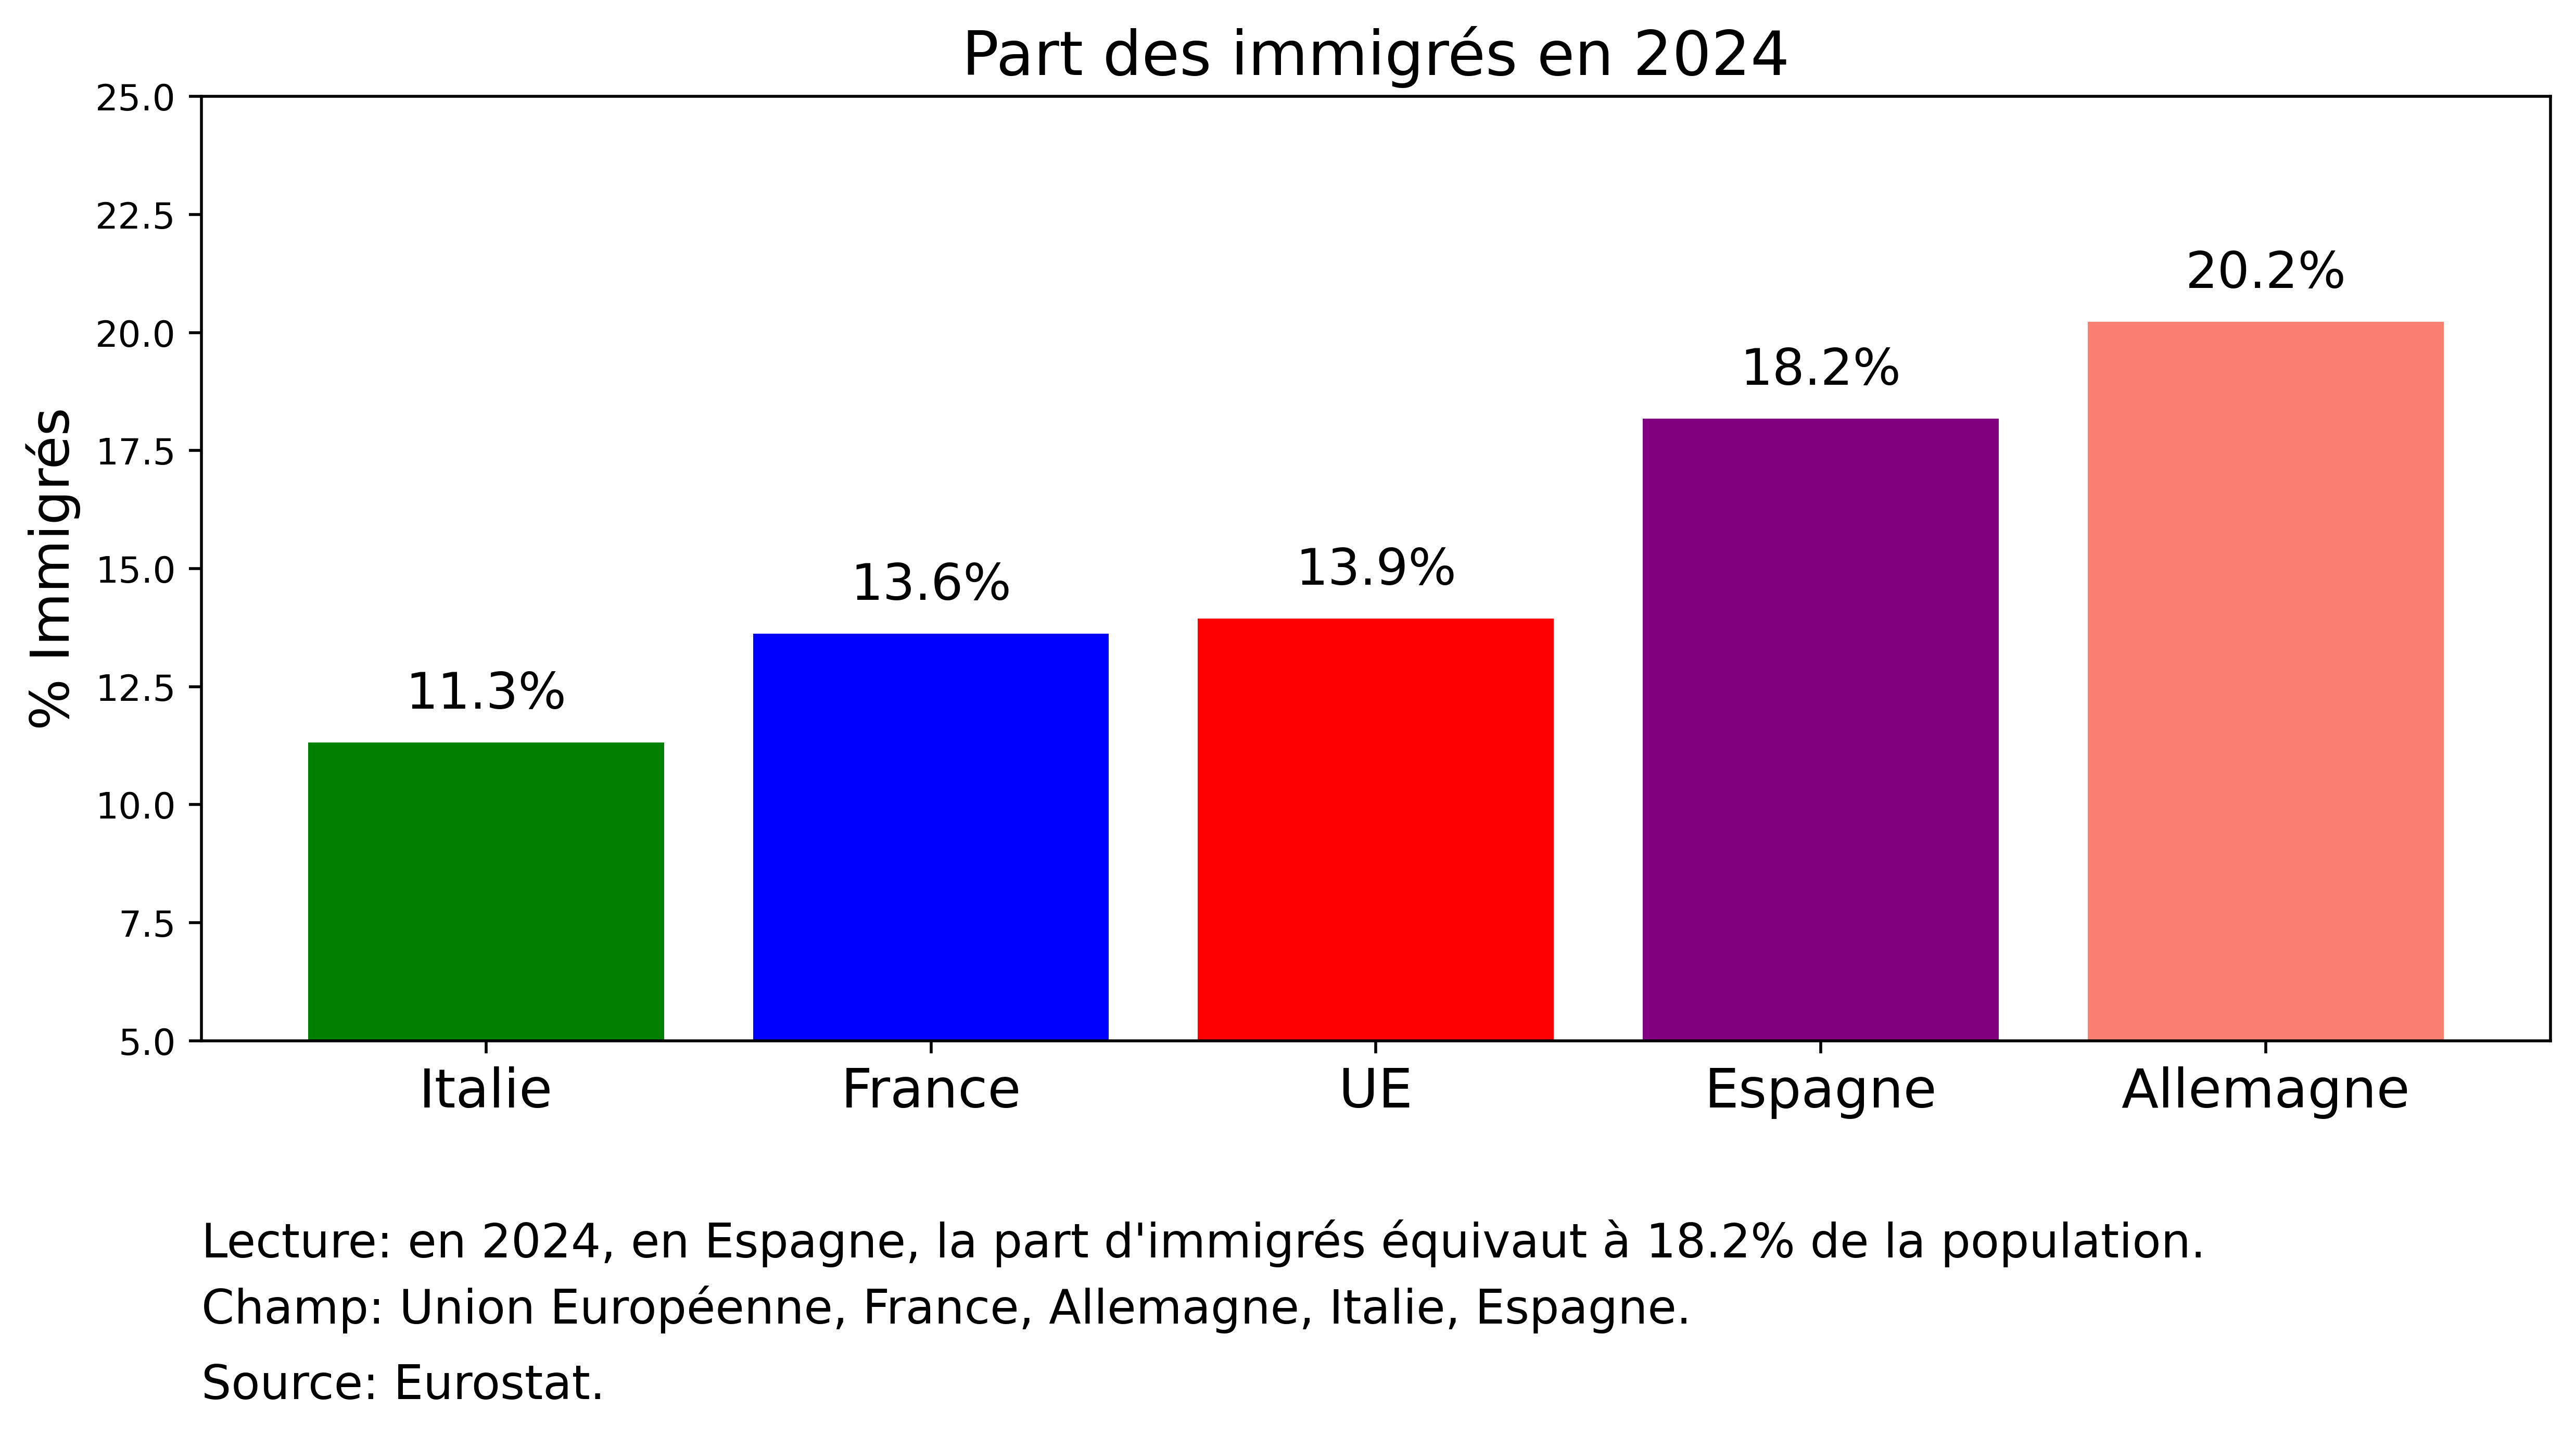

In [19]:
# Extraire les données pour 2024 uniquement
year = '2024'
#bar_data = plot_data.loc[year, countries]
bar_data = plot_data.loc[year, countries].sort_values()


# Création du graphique en barres
fig, ax = plt.subplots(figsize=(10, 6), dpi=500)

lecture_fr = f"en 2024, en Espagne, la part d'immigrés équivaut à 18.2% de la population"
title_fr = "Part des immigrés en 2024"

colors = ['green', 'blue', 'red', 'purple', 'salmon']
countries = ['Italie', 'France', 'UE' , 'Espagne', 'Allemagne']
fontsize = 15
width = 2.5

# Tracer les barres
ax.bar(bar_data.index, bar_data.values, color=colors)

# Ajouter les valeurs sur les barres
for i, val in enumerate(bar_data.values):
    ax.text(i, val + 0.5, f"{val:.1f}%", ha='center', va='bottom', fontsize=fontsize - 1)

# Source et légende

set_ax(ax, source_fr, source_en, note_fr, note_en, language, lecture_fr, lecture_en, title_fr, title_en, "", width, fontsize)

# Mise en forme
ax.set_ylim(5, 25)
ax.set_ylabel('% Immigrés', fontsize=fontsize)
ax.set_title("Part des immigrés en 2024", fontsize=fontsize + 2)
ax.set_xticklabels(countries, rotation=0, ha='center', fontsize=fontsize)
#ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.grid(axis='y', linestyle='--', alpha=0.0)
ax.grid(axis='x', linestyle='--', alpha=0.0)
plt.tight_layout()
#plt.show()

plt.savefig(f"plots/immig_EU_part_2024_"+language+f".png", dpi=500, bbox_inches='tight')


2015
2016
2017
2018
2019
2020
2021
2022
2023
2024


/Users/lvm/Desktop/analyse/analyse-github/study/venv/lib/python3.13/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


[0.11000000000000001, 0.15, 0.05, -0.04, -0.03, 0.08, 0.16999999999999998, 0.06, 0.27999999999999997, 0.22000000000000003, 0.2, 0.22000000000000003]
[0.11000000000000001, 0.1, 0.15, 0.31, 0.18, 0.22000000000000003, 0.41, 0.31, 0.04, 0.26, 0.67, 0.62]


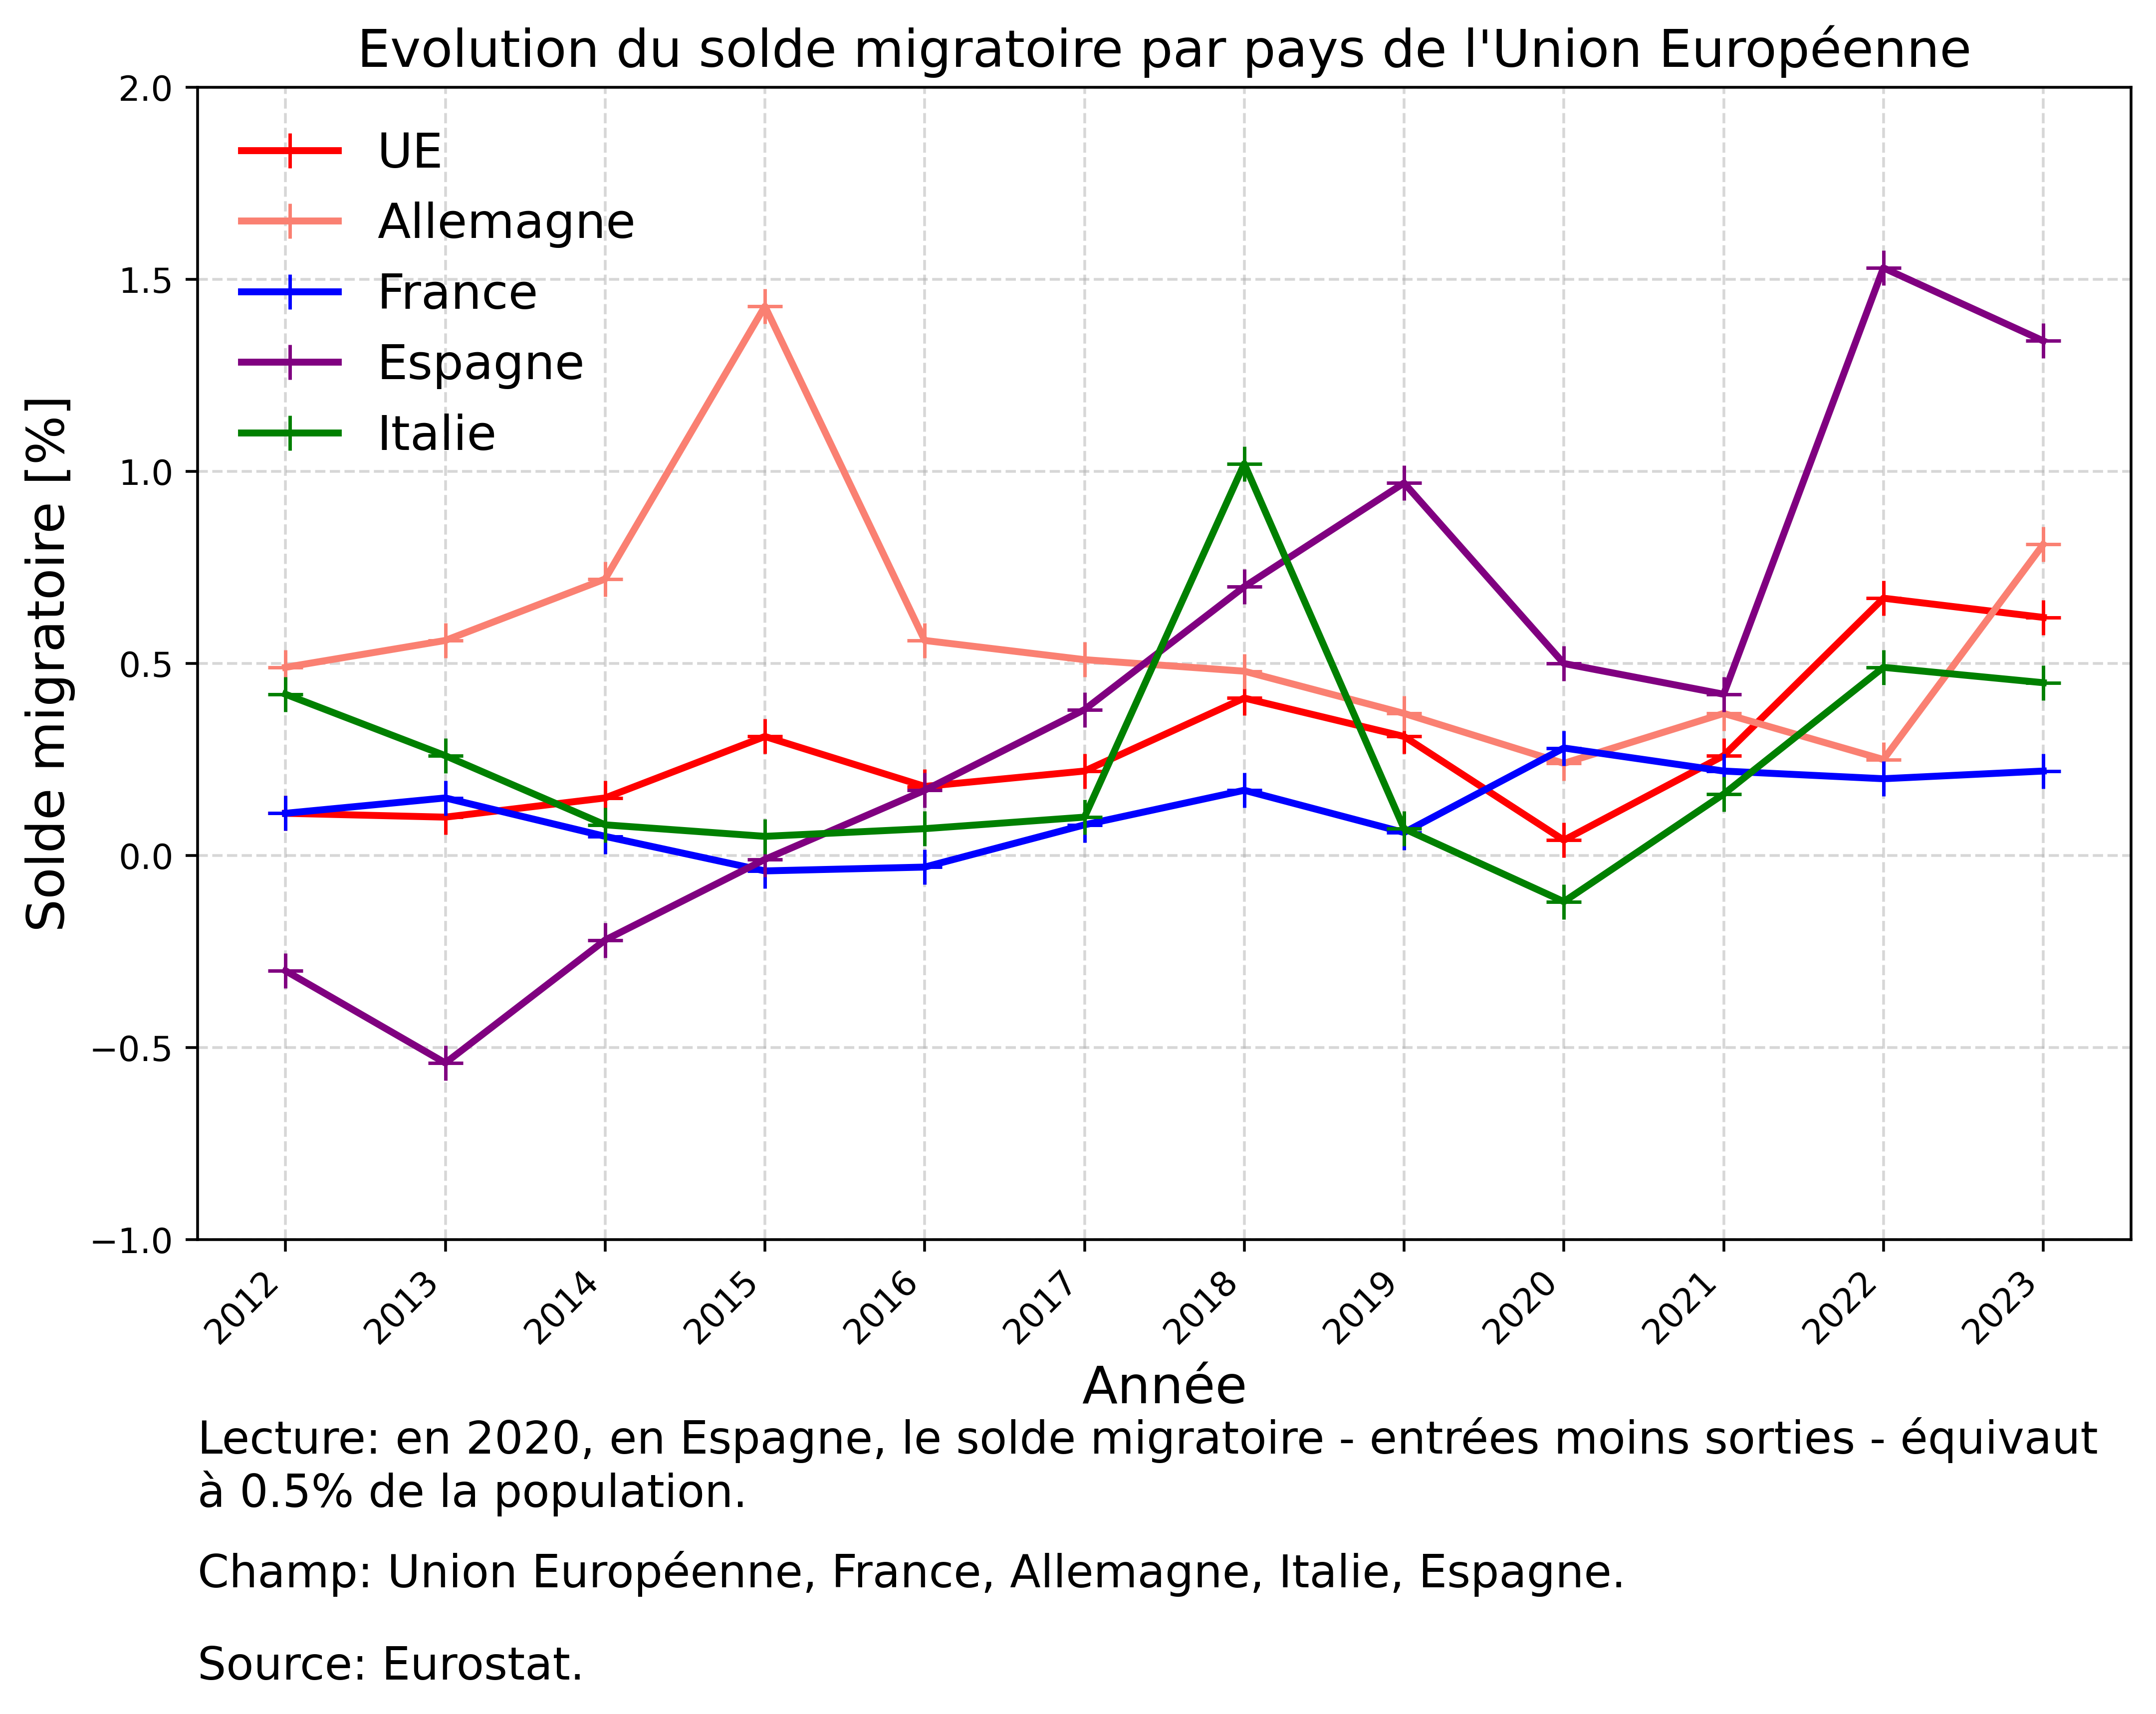

In [20]:

# Load the Excel file
file_path = "data/tps00019_page_spreadsheet_solde_migratoire.xlsx"
data_sheet = pd.read_excel(file_path, sheet_name="Data", header=None)

# Extract years (row 7, skipping empty cells)
years = []
for col in range(1, 25, 2):  # Columns B, D, F, ..., X (every second column)
    year = data_sheet.iloc[7, col]
    if pd.notna(year) and str(year).isdigit():
        years.append(int(year))

# Countries to plot
target_countries = [
    "European Union - 27 countries (from 2020)",
    "Germany",
    "France",
    "Spain",
    "Italy"
]

# Initialize data storage
migration_data = {country: [] for country in target_countries}

# Extract data for each country
for row in range(8, 60):  # Adjust row range to cover all countries
    country = data_sheet.iloc[row, 0]
    if country in target_countries:
        rates = []
        for col in range(1, 25, 2):  # Match columns to years
            val = data_sheet.iloc[row, col]
            # Handle numeric values (ignore flags like 'b', 'e')
            if isinstance(val, (int, float)) or (isinstance(val, str) and val.replace('.', '').isdigit()):
                rates.append(float(val)/10)
            else:
                rates.append(None)  # Mark missing data
        migration_data[country] = rates[:len(years)]  # Align with years

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6), dpi=500)



width = 2.5
fontsize = 15

source_fr = "Eurostat"
source_en = "Eurostat"
lecture_fr = f"en 2020, en Espagne, le solde migratoire - entrées moins sorties - équivaut\nà 0.5% de la population"
lecture_en = f"in 2017, net migration - inward migration minus outward migration -\nwas equivalent to 200 thousand immigrants"
title_fr = "Evolution du solde migratoire par pays de l'Union Européenne"
title_en = "Evolution of the net migration by category"
note_fr = ""
note_en = ""
label_fr = "Solde migratoire [milliers]"
label_en = "Net migration [thousands]"

label_x = label_annee
label_leg = [label_immig, "", label_non_immig, ""]
if language == 'fr':
    label_y = label_fr
elif language == 'en':
    label_y = label_en

set_ax(ax, source_fr, source_en, note_fr, note_en, language, lecture_fr, lecture_en, title_fr, title_en, label_x, width, fontsize)

# Plot each country with styled lines/markers
styles = {
    "European Union - 27 countries (from 2020)": ("red", "o", "-", "UE"),
    "Germany": ("salmon", "s", "--", "Allemagne"),
    "France": ("blue", "^", "-.", "France"),
    "Spain": ("purple", "D", ":", "Espagne"),
    "Italy": ("green", "P", "-", "Italie")
}

for country in target_countries:
    color, marker, linestyle, c = styles[country]
    plt.plot(
        years,
        migration_data[country],
        color=color,
        marker='+',
        markersize=10,
        linewidth=2,
        label=c
    )
print(migration_data["France"])
print(migration_data["European Union - 27 countries (from 2020)"])
    
ax.legend(fontsize=fontsize-1, frameon=False)
ax.set_ylim(-1, 2)
ax.set_ylabel('Solde migratoire [%]', fontsize=fontsize)
ax.set_xticks(years)
ax.set_xticklabels(years, rotation=45, ha='right')

plt.savefig(f"plots/immig_EU_solde_mig_"+language+f".png", dpi=500, bbox_inches='tight')